In [1]:
import pandas as pd 
import numpy as np

In [2]:
sms = pd.read_csv("spam.csv")
data = pd.DataFrame(sms)

In [3]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.rename(columns={'v1':'label','v2':'message'},inplace = True)
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mapping = {'ham':0,'spam':1}
data['label']=data['label'].map(mapping)
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data=data[['message','label']]
data.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
data.shape
data['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [9]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
wl = WordNetLemmatizer()
def data_preprocess(x):
    modified_messages = []
    for i in range(len(x)):
        word = re.sub('[^a-zA-Z]',' ',x[i])
        word = word.lower()
        word = word.split()
        word = [wl.lemmatize(final_word) for final_word in word if not final_word in set(stopwords.words('english'))]
        word = ' '.join(word)
        modified_messages.append(word)
    data['message']=modified_messages
data_preprocess(data['message'])

In [10]:
print(data['message'])

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object


In [11]:
def tofeatures(message):
    from sklearn.feature_extraction.text import CountVectorizer
    bow = CountVectorizer(max_features=5000,lowercase=True)
    X=bow.fit_transform(message).toarray()
    return X
X=tofeatures(data['message'])
print(X,X.shape)
#print(data['label'])
#y=data['label'].iloc[:,1].values
y=data['label'].to_numpy()
y.reshape(-1,1)
print(y,y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (5572, 5000)
[0 0 1 ... 0 0 0] (5572,)


In [12]:
#print(data['label'][0:10])
#Spliting dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
print(X.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5572, 5000) (4457, 5000) (1115, 5000) (4457,) (1115,)


In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y_train)

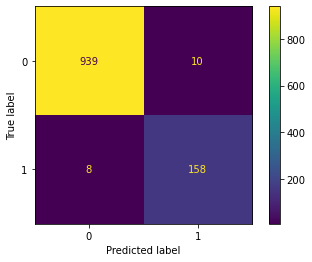

In [15]:
predict = model.predict(X_test)
# print(y_test,predict)
# for item_a, item_b in zip(y_test, predict):
#     print(item_a, item_b)
#confusion matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
count_values = confusion_matrix(y_test,predict)
#print(count_values)
plot_confusion_matrix(model,X_test,y_test)

import matplotlib.pyplot as plt
plt.show()



In [16]:
#Getting accuracy
from sklearn.metrics import accuracy_score,classification_report
#print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict,target_names = ['Spam','Ham']))

              precision    recall  f1-score   support

        Spam       0.99      0.99      0.99       949
         Ham       0.94      0.95      0.95       166

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115

